# Import packages

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Load Data

In [62]:
df=pd.read_csv("GlobalWarming.csv")

# Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
Year        308 non-null int64
Month       308 non-null int64
MEI         308 non-null float64
CO2         308 non-null float64
CH4         308 non-null float64
N2O         308 non-null float64
CFC-11      308 non-null float64
CFC-12      308 non-null float64
TSI         308 non-null float64
Aerosols    308 non-null float64
Temp        308 non-null float64
dtypes: float64(9), int64(2)
memory usage: 26.5 KB


In [7]:
df.shape

(308, 11)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,308.0,1995.662338,7.423197,1983.0000,1989.00000,1996.00000,2002.00000,2008.0000
Month,308.0,6.551948,3.447214,1.0000,4.00000,7.00000,10.00000,12.0000
MEI,308.0,0.275555,0.937918,-1.6350,-0.39875,0.23750,0.83050,3.0010
CO2,308.0,363.226753,12.647125,340.1700,353.02000,361.73500,373.45500,388.5000
CH4,308.0,1749.824513,46.051678,1629.8900,1722.18250,1764.04000,1786.88500,1814.1800
N2O,308.0,312.391834,5.225131,303.6770,308.11150,311.50700,316.97900,322.1820
CFC-11,308.0,251.973068,20.231783,191.3240,246.29550,258.34400,267.03100,271.4940
CFC-12,308.0,497.524782,57.826899,350.1130,472.41075,528.35600,540.52425,543.8130
TSI,308.0,1366.070759,0.399610,1365.4261,1365.71705,1365.98090,1366.36325,1367.3162
Aerosols,308.0,0.016657,0.029050,0.0016,0.00280,0.00575,0.01260,0.1494


In [63]:
dfwmd=df.drop(["Year","Month"],axis=1)

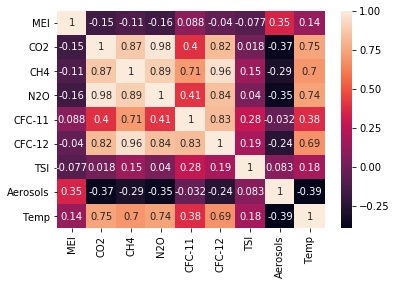

In [15]:
sns.heatmap(dfwmd.corr(), annot=True)

# 1
CO2, CH4, CFC-12 and Temp are having high corelation with N2O is 0.98, 0.89, 0.84 and 0.74 respectively

In [30]:
feautre=[]

In [31]:
import statsmodels.api as sm
from __future__ import print_function
from patsy import dmatrices

In [64]:
dfwmd = dfwmd.rename(columns={'CFC-11': 'CFC11', 'CFC-12': 'CFC12'})

In [68]:
dfwmd.shape

(308, 9)

In [71]:
from statsmodels.formula.api import ols
model1 = ols('Temp ~ MEI+ CO2+CH4+N2O+CFC11+CFC12+TSI+ Aerosols',data=dfwmd).fit()

In [72]:
variables = model1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[13454981.483446594,
 1.225695863648046,
 27.9961032810541,
 19.129507584320802,
 61.03745302018507,
 31.829321263531924,
 93.49818247345468,
 1.1409763102539472,
 1.3544700995628454]

In [81]:
dfwmd.corr()

,MEI,CO2,CH4,N2O,CFC11,CFC12,TSI,Aerosols,Temp
MEI,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC11,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC12,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069
Temp,0.135292,0.748505,0.699697,0.743242,0.380111,0.688944,0.182186,-0.392069,1.000000


# 3
CO2, CH4, NO2, CFC-12 are having high corelation win dependent variable with 0.74, 0.699, 0.74, 0.688 respectively
corelation is good when the corelation between dependent and independent variables.
But corelation between independent variables in not good.

If the corelation between dependend variable and independent variable are high then model is good 
because when we are comparing with dependent variable we can put other variables constant and compute the quantity or quality
But if the corelation between dependent variable is high then one varible changes the other also changes which is having high
corelation

In [138]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [142]:
dfws=dfwmd.drop(['Temp'], axis=1)

In [149]:
# Create a dummy regressor
dummy_mean = DummyRegressor(strategy='mean')

# "Train" dummy regressor
dummy_mean.fit(dfws, df.Temp)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [150]:
pr=dummy_mean.predict(dfws)

In [152]:
sse4=np.square(pr-df.Temp).sum()

In [154]:
sse4

9.846455542207792

In [153]:
sst4=np.square(pr-df.Temp.mean()).sum()

In [155]:
sst4

9.490982765940298e-31

In [1]:
model2 = ols('Temp ~ CO2+N2O+CFC12+Aerosols',data=dfwmd).fit()

In [89]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     111.9
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.81e-58
Time:                        15:25:04   Log-Likelihood:                 232.93
No. Observations:                 308   AIC:                            -455.9
Df Residuals:                     303   BIC:                            -437.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9781      1.198     -2.485      0.0

In [90]:
modelpred = model2.predict()

In [103]:
from sklearn.metrics import mean_squared_error
from math import sqrt 
rmse = sqrt(mean_squared_error(modelpred, df.Temp))

In [104]:
rmse

0.11358646701873876

In [100]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [101]:
mean_absolute_percentage_error(modelpred, df.Temp)

72.14483876774396

In [112]:
sse=np.square(modelpred-df.Temp).sum()
sse

3.9737807308581

# 5
RMSE is 0.11<br>
SSE is 3.973<br> 
MAPE is 72.14<br>
R2 is 0.596

In [113]:
sst=np.square(df.Temp-df.Temp.mean()).sum()

In [114]:
R2=1-(sse/sst)

In [115]:
R2

0.5964252604580297

# 6
Above is the calculated solution to R2

In [135]:
dfwmd['m']=modelpred

In [136]:
co=dfwmd.m.corr(df.Temp)

In [137]:
co**2

0.5964252604580302

# 7
Above is the solution for R2 using corelation

# 8
The Null hypothesis is that coefficient of dependent variable is equal to zero i.e.., beta1=0
In other terms their is no relation between dependent and independent variable

Tha Alternative hypothesis that coefficient of dependent variable is not equal to zero i.e.., beta1!=0
In other terms their is a relation between dependent and independent variable